In [74]:
import xml.etree.ElementTree as ET
import pandas as pd

In [159]:
def get_results(path_to_xml, input_concentration):
    tree = ET.parse(path_to_xml)
    df = pd.DataFrame()
    for a in tree.findall('{http://www.wyatt.com/schemas/ExperimentReport}results'):
        for b in a: 
            
            # Get mass measurements
            if b.attrib['type'] == 'molar mass':
                res = {}
                res['measurement_type'] = b[0].text
                if b[1].text != 'n/a':
                    res['mass'] = float(b[1].text)
                else:
                    res['mass'] = np.nan
                if 'uncertainty' in b[1].attrib:
                    res['uncertainty'] = float(b[1].attrib['uncertainty'])
                else:
                    res['uncertainty'] = np.nan
                df = df.append(res, ignore_index=True)
                
            # Get concentration
            if b.attrib['type'] == 'concentration':
                ave_conc = float(b[1].text)
                
            # Get total mass
            if b.attrib['type'] == 'mass':
                if b[0].text == 'Calculated Mass':
                    total_mass = float(b[1].text)
                
    df['input_concentration'] = input_concentration
#     df['average_concentration'] = ave_conc
#     df['total_mass'] = total_mass
    return df

In [160]:
res500 = get_results('xml/ASTRA 6 Report 20220128_Par2Ring_WT_S75_500ugml.xml', 500)
res750 = get_results('xml/ASTRA 6 Report 20220128_Par2Ring_WT_S75_750ugml.xml', 750)
res2000 = get_results('xml/ASTRA 6 Report 20210927_Par2Ring_WT_S75_2mgml.xml', 2000)
res5000 = get_results('xml/ASTRA 6 Report 20210924_Par2Ring_WT_S75_5mgml.xml', 5000)
res10000 = get_results('xml/ASTRA 6 Report 20220131_Par2Ring_WT_S75_10mgml.xml', 10000)
full_res = pd.concat([res500, res750, res2000, res5000, res10000])

In [161]:
full_res

,measurement_type,mass,uncertainty,input_concentration
0,Mn,11113.69427,636.032963,500
1,Mp,12433.70804,628.235885,500
2,Mv,NaN,NaN,500
3,Mw,11552.41951,606.309969,500
4,Mz,11833.58914,1364.307785,500
5,Mz+1,12021.82253,2167.459908,500
6,M(avg),10572.29111,44.686883,500
0,Mn,12154.95045,546.765644,750
1,Mp,13143.09081,566.086651,750
2,Mv,NaN,NaN,750


In [167]:
full_res.to_csv('mass_measurements_titration.csv')

### Plot titration

<IPython.core.display.Javascript object>


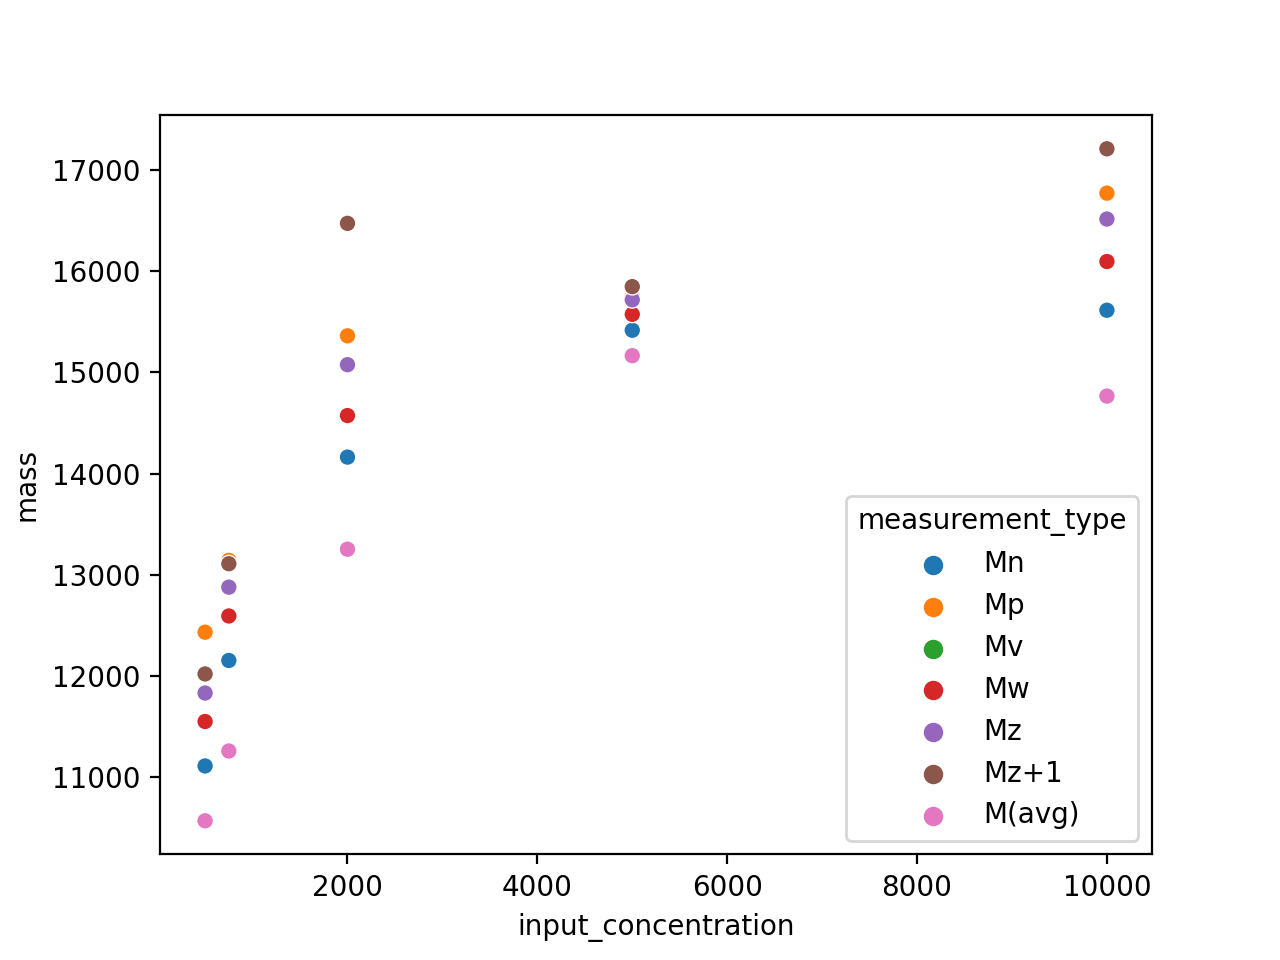

<AxesSubplot:xlabel='input_concentration', ylabel='mass'>

In [163]:
import seaborn as sns

fig, ax = plt.subplots()
sns.scatterplot(data=full_res, x='input_concentration', y='mass', hue='measurement_type')

<IPython.core.display.Javascript object>


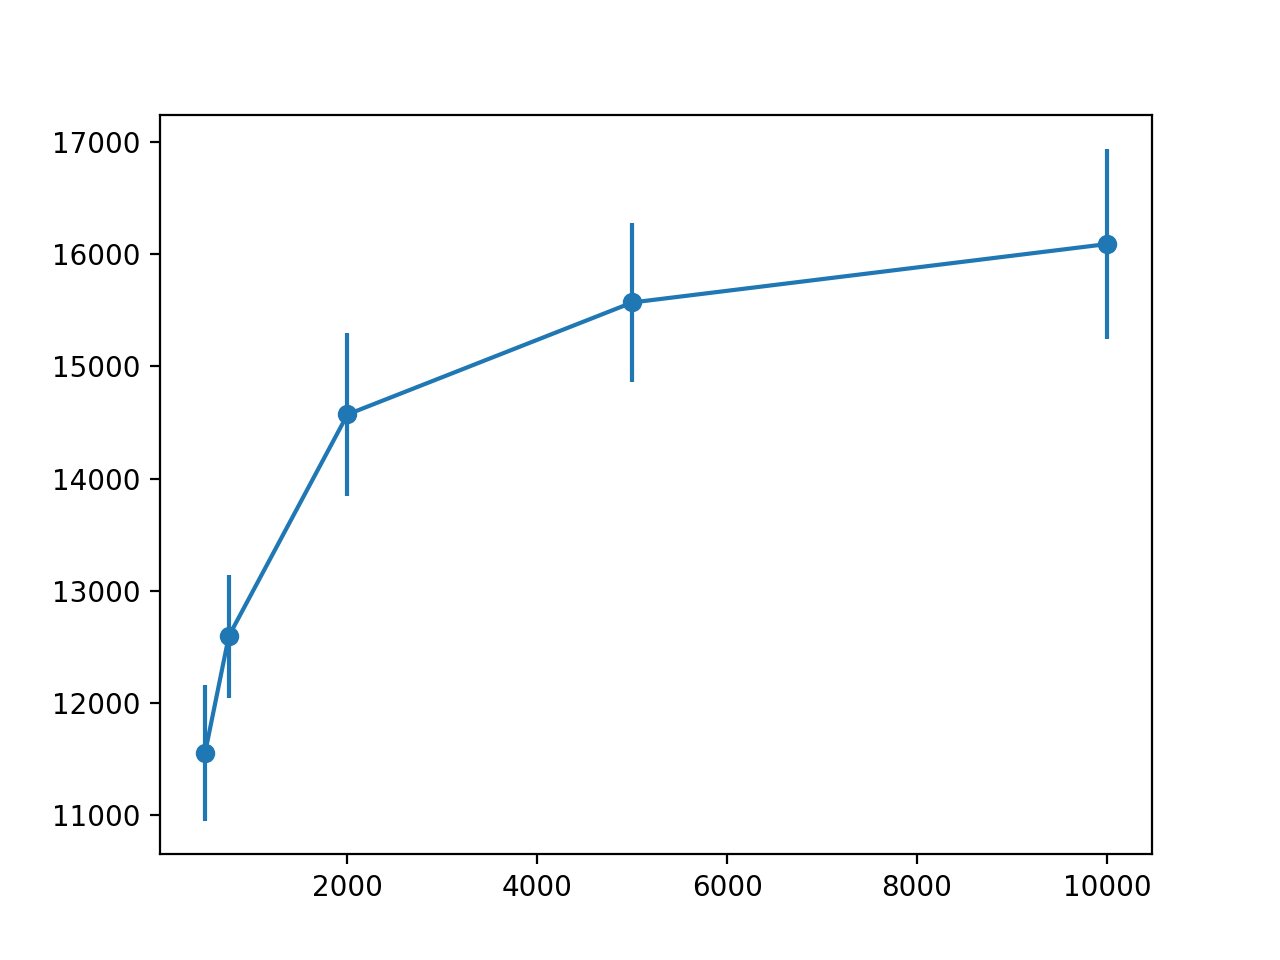

<ErrorbarContainer object of 3 artists>

In [166]:
res_sample = full_res[full_res['measurement_type'] == 'Mw']

fig, ax = plt.subplots()
ax.scatter(res_sample['input_concentration'], res_sample['mass'])
ax.errorbar(res_sample['input_concentration'], res_sample['mass'], yerr=res_sample['uncertainty'])